In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import NJODE.data_utils as data_utils
import NJODE.train as train

param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [5], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.5], 'weight_decay': [1.0], 'dataset': ['BlackScholes', 'Heston', 'OrnsteinUhlenbeck'], 'dataset_id': [None], 'plot': [True], 'evaluate': [True], 'paths_to_plot': [(0, 1, 2, 3, 4)]}
param_dict: {'epochs': [100], 'batch_size': [20], 'save_every': [10], 'learning_rate': [0.001], 'test_size': [0.2], 'training_size': [200, 400, 800, 1600, 3200, 6400, 12800], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((10, 'tanh'), (10, 'tanh'))], 'readout_nn': [((10, 'tanh'), (10, 'tanh'))], 'enc_nn': [((10, 'tanh'), (10, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 's

In [ ]:
dataset_dic = {
    'volatility': np.array([[1, 0, 0], [0, 1.5, 0], [0,0, 2]]).tolist(),
    'mean': np.array([1.2, 1.0, 1.5]).tolist(),
    'speed': np.array([[0.3, 0.0, 0.0], [0.0, 0.4, 0.0],[0.0,0.0,0.5]]).tolist(),
    'nb_paths': 10000,
    'nb_steps': 100,
    'S0': np.array([20, 17 ,20]).tolist(),
    'maturity': 1.0,
    'dimension': 3,
    'obs_perc': 1.0,
    'scheme': 'euler',
    'model_name': 'OrnsteinUhlenbeckForZ',
   'dt': 0.01
}
_, dataset_id = data_utils.create_dataset("OrnsteinUhlenbeckForZ",dataset_dic)
train.train(dataset="OrnsteinUhlenbeckForZ", dataset_id=dataset_id, use_cond_exp=False, eval_use_true_paths=True, plot=True,  which_loss = 'easy_vol')
dataset_dic_mu = {
    'volatility': np.array([[0.2, 0.1, 0.1], [0.1, 0.25, 0.1], [0.1, 0.1, 0.3]]).tolist(),
    'mean': np.array([1.2, 1.0, 1.5]).tolist(),
    'speed': np.array([[0.3, 0.0, 0.0], [0.0, 0.3, 0.0], [0.0, 0.0, 0.3]]).tolist(),
    'nb_paths': 10000,
    'nb_steps': 100,
    'S0': np.array([1.0, 1.5, 2.0]).tolist(),
    'maturity': 1.0,
    'dimension': 3,
    'obs_perc': 1.0,
    'scheme': 'euler',
    'model_name': 'OrnsteinUhlenbeckMultiDimensional',
    'dt': 0.01
}
_, dataset_id_mu = data_utils.create_dataset("OrnsteinUhlenbeckMultiDimensional",dataset_dic_mu)
train.train(dataset="OrnsteinUhlenbeckMultiDimensional", dataset_id=dataset_id_mu, use_cond_exp=True,plot=True, which_loss ='easy')

{'S0': [20, 17, 20], 'dimension': 3, 'dt': 0.01, 'maturity': 1.0, 'mean': [1.2, 1.0, 1.5], 'model_name': 'OrnsteinUhlenbeckForZ', 'nb_paths': 10000, 'nb_steps': 100, 'obs_perc': 1.0, 'scheme': 'euler', 'speed': [[0.3, 0.0, 0.0], [0.0, 0.4, 0.0], [0.0, 0.0, 0.5]], 'volatility': [[1.0, 0.0, 0.0], [0.0, 1.5, 0.0], [0.0, 0.0, 2.0]]}
using loss: easy_vol
neuralODE use input scaling with tanh
use residual network: input_size=3, output_size=10
use residual network: input_size=10, output_size=3
model-id: None

using CPU
input_coords: [0 1 2]
output_coords: [0 1 2]
input_size: 3
output_size: 3
signature_coords: [0 1 2]
new model_id=88
model params:
{"batch_size": 100, "bias": true, "data_dict": null, "dataset": "OrnsteinUhlenbeckForZ", "dataset_id": 95, "dropout_rate": 0.1, "enc_nn": [[50, "tanh"], [50, "tanh"]], "epochs": 100, "hidden_size": 10, "input_size": 3, "learning_rate": 0.001, "ode_nn": [[50, "tanh"], [50, "tanh"]], "optimal_val_loss": NaN, "options": {"eval_use_true_paths": true, "us

80it [00:22,  3.60it/s]


evaluating ...
epoch 1, weight=0.50000, train-loss=0.11809, optimal-val-loss=nan, val-loss=2.31954, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:987: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)
C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.31954
save model ...
saved!
save new best model: last-best-loss: inf, new-best-loss: 2.31954, epoch: 1
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.59it/s]


evaluating ...
epoch 2, weight=0.50000, train-loss=0.12296, optimal-val-loss=nan, val-loss=2.32080, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32080
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.58it/s]


evaluating ...
epoch 3, weight=0.50000, train-loss=0.11402, optimal-val-loss=nan, val-loss=2.32252, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32252
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.59it/s]


evaluating ...
epoch 4, weight=0.50000, train-loss=0.11415, optimal-val-loss=nan, val-loss=2.32441, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32441
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.31it/s]


evaluating ...
epoch 5, weight=0.50000, train-loss=0.11211, optimal-val-loss=nan, val-loss=2.32639, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32639
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.56it/s]


evaluating ...
epoch 6, weight=0.50000, train-loss=0.11726, optimal-val-loss=nan, val-loss=2.32643, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32643
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:21,  3.69it/s]


evaluating ...
epoch 7, weight=0.50000, train-loss=0.10898, optimal-val-loss=nan, val-loss=2.32674, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32674
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.52it/s]


evaluating ...
epoch 8, weight=0.50000, train-loss=0.11651, optimal-val-loss=nan, val-loss=2.32664, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32664
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:21,  3.70it/s]


evaluating ...
epoch 9, weight=0.50000, train-loss=0.11458, optimal-val-loss=nan, val-loss=2.32688, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32688
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.56it/s]


evaluating ...
epoch 10, weight=0.50000, train-loss=0.11870, optimal-val-loss=nan, val-loss=2.32690, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32690
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.54it/s]


evaluating ...
epoch 11, weight=0.50000, train-loss=0.12045, optimal-val-loss=nan, val-loss=2.32713, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32713
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.61it/s]


evaluating ...
epoch 12, weight=0.50000, train-loss=0.11614, optimal-val-loss=nan, val-loss=2.32719, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32719
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.60it/s]


evaluating ...
epoch 13, weight=0.50000, train-loss=0.11536, optimal-val-loss=nan, val-loss=2.32741, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32741
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:21,  3.67it/s]


evaluating ...
epoch 14, weight=0.50000, train-loss=0.11846, optimal-val-loss=nan, val-loss=2.32812, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32812
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.52it/s]


evaluating ...
epoch 15, weight=0.50000, train-loss=0.11778, optimal-val-loss=nan, val-loss=2.32748, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32748
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.56it/s]


evaluating ...
epoch 16, weight=0.50000, train-loss=0.11518, optimal-val-loss=nan, val-loss=2.32730, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32730
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.24it/s]


evaluating ...
epoch 17, weight=0.50000, train-loss=0.11748, optimal-val-loss=nan, val-loss=2.32774, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32774
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:23,  3.42it/s]


evaluating ...
epoch 18, weight=0.50000, train-loss=0.11436, optimal-val-loss=nan, val-loss=2.32749, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32749
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.10it/s]


evaluating ...
epoch 19, weight=0.50000, train-loss=0.11893, optimal-val-loss=nan, val-loss=2.32796, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32796
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.82it/s]


evaluating ...
epoch 20, weight=0.50000, train-loss=0.11688, optimal-val-loss=nan, val-loss=2.32799, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32799
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:31,  2.52it/s]


evaluating ...
epoch 21, weight=0.50000, train-loss=0.12216, optimal-val-loss=nan, val-loss=2.32802, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32802
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:34,  2.35it/s]


evaluating ...
epoch 22, weight=0.50000, train-loss=0.11790, optimal-val-loss=nan, val-loss=2.32870, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32870
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:44,  1.82it/s]


evaluating ...
epoch 23, weight=0.50000, train-loss=0.11163, optimal-val-loss=nan, val-loss=2.32929, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32929
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:52,  1.53it/s]


evaluating ...
epoch 24, weight=0.50000, train-loss=0.11259, optimal-val-loss=nan, val-loss=2.32957, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32957
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:58,  1.36it/s]


evaluating ...
epoch 25, weight=0.50000, train-loss=0.11559, optimal-val-loss=nan, val-loss=2.32928, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32928
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:01,  1.29it/s]


evaluating ...
epoch 26, weight=0.50000, train-loss=0.11303, optimal-val-loss=nan, val-loss=2.33067, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33067
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:05,  1.21it/s]


evaluating ...
epoch 27, weight=0.50000, train-loss=0.11433, optimal-val-loss=nan, val-loss=2.33140, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33140
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:56,  1.41it/s]


evaluating ...
epoch 28, weight=0.50000, train-loss=0.11417, optimal-val-loss=nan, val-loss=2.33084, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33084
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:51,  1.55it/s]


evaluating ...
epoch 29, weight=0.50000, train-loss=0.11510, optimal-val-loss=nan, val-loss=2.33080, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33080
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:47,  1.67it/s]


evaluating ...
epoch 30, weight=0.50000, train-loss=0.11736, optimal-val-loss=nan, val-loss=2.33130, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33130
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:43,  1.84it/s]


evaluating ...
epoch 31, weight=0.50000, train-loss=0.12114, optimal-val-loss=nan, val-loss=2.33086, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33086
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:38,  2.08it/s]


evaluating ...
epoch 32, weight=0.50000, train-loss=0.11468, optimal-val-loss=nan, val-loss=2.33127, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33127
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:37,  2.12it/s]


evaluating ...
epoch 33, weight=0.50000, train-loss=0.12026, optimal-val-loss=nan, val-loss=2.33126, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33126
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:36,  2.17it/s]


evaluating ...
epoch 34, weight=0.50000, train-loss=0.11575, optimal-val-loss=nan, val-loss=2.33127, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33127
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:35,  2.22it/s]


evaluating ...
epoch 35, weight=0.50000, train-loss=0.11317, optimal-val-loss=nan, val-loss=2.33222, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33222
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:37,  2.15it/s]


evaluating ...
epoch 36, weight=0.50000, train-loss=0.11137, optimal-val-loss=nan, val-loss=2.33201, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33201
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:37,  2.12it/s]


evaluating ...
epoch 37, weight=0.50000, train-loss=0.11398, optimal-val-loss=nan, val-loss=2.33126, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33126
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:35,  2.24it/s]


evaluating ...
epoch 38, weight=0.50000, train-loss=0.11527, optimal-val-loss=nan, val-loss=2.33192, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33192
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:36,  2.22it/s]


evaluating ...
epoch 39, weight=0.50000, train-loss=0.11616, optimal-val-loss=nan, val-loss=2.33183, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33183
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:34,  2.35it/s]


evaluating ...
epoch 40, weight=0.50000, train-loss=0.11585, optimal-val-loss=nan, val-loss=2.33123, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33123
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:33,  2.42it/s]


evaluating ...
epoch 41, weight=0.50000, train-loss=0.11531, optimal-val-loss=nan, val-loss=2.33109, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33109
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:34,  2.33it/s]


evaluating ...
epoch 42, weight=0.50000, train-loss=0.11637, optimal-val-loss=nan, val-loss=2.33102, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33102
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:33,  2.37it/s]


evaluating ...
epoch 43, weight=0.50000, train-loss=0.11625, optimal-val-loss=nan, val-loss=2.33171, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33171
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:31,  2.51it/s]


evaluating ...
epoch 44, weight=0.50000, train-loss=0.11280, optimal-val-loss=nan, val-loss=2.33077, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33077
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:30,  2.60it/s]


evaluating ...
epoch 45, weight=0.50000, train-loss=0.11554, optimal-val-loss=nan, val-loss=2.33210, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33210
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:31,  2.56it/s]


evaluating ...
epoch 46, weight=0.50000, train-loss=0.11637, optimal-val-loss=nan, val-loss=2.33111, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33111
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:29,  2.69it/s]


evaluating ...
epoch 47, weight=0.50000, train-loss=0.11540, optimal-val-loss=nan, val-loss=2.33106, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33106
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:31,  2.52it/s]


evaluating ...
epoch 48, weight=0.50000, train-loss=0.11441, optimal-val-loss=nan, val-loss=2.33108, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33108
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:30,  2.62it/s]


evaluating ...
epoch 49, weight=0.50000, train-loss=0.12021, optimal-val-loss=nan, val-loss=2.33112, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33112
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:30,  2.58it/s]


evaluating ...
epoch 50, weight=0.50000, train-loss=0.12226, optimal-val-loss=nan, val-loss=2.33120, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33120
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:32,  2.45it/s]


evaluating ...
epoch 51, weight=0.50000, train-loss=0.11688, optimal-val-loss=nan, val-loss=2.33332, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33332
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:30,  2.64it/s]


evaluating ...
epoch 52, weight=0.50000, train-loss=0.11396, optimal-val-loss=nan, val-loss=2.33172, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33172
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:31,  2.51it/s]


evaluating ...
epoch 53, weight=0.50000, train-loss=0.11505, optimal-val-loss=nan, val-loss=2.33111, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33111
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:31,  2.51it/s]


evaluating ...
epoch 54, weight=0.50000, train-loss=0.11980, optimal-val-loss=nan, val-loss=2.33089, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33089
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:33,  2.39it/s]


evaluating ...
epoch 55, weight=0.50000, train-loss=0.11514, optimal-val-loss=nan, val-loss=2.33154, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33154
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:33,  2.40it/s]


evaluating ...
epoch 56, weight=0.50000, train-loss=0.11531, optimal-val-loss=nan, val-loss=2.33160, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33160
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:33,  2.37it/s]


evaluating ...
epoch 57, weight=0.50000, train-loss=0.11489, optimal-val-loss=nan, val-loss=2.33118, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33118
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:34,  2.33it/s]


evaluating ...
epoch 58, weight=0.50000, train-loss=0.11704, optimal-val-loss=nan, val-loss=2.33094, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33094
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:38,  2.09it/s]


evaluating ...
epoch 59, weight=0.50000, train-loss=0.11901, optimal-val-loss=nan, val-loss=2.33098, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33098
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:40,  1.95it/s]


evaluating ...
epoch 60, weight=0.50000, train-loss=0.11689, optimal-val-loss=nan, val-loss=2.33099, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33099
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:43,  1.85it/s]


evaluating ...
epoch 61, weight=0.50000, train-loss=0.11706, optimal-val-loss=nan, val-loss=2.33192, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33192
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:46,  1.73it/s]


evaluating ...
epoch 62, weight=0.50000, train-loss=0.11310, optimal-val-loss=nan, val-loss=2.33159, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33159
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:55,  1.44it/s]


evaluating ...
epoch 63, weight=0.50000, train-loss=0.12081, optimal-val-loss=nan, val-loss=2.33140, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33140
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:54,  1.47it/s]


evaluating ...
epoch 64, weight=0.50000, train-loss=0.11547, optimal-val-loss=nan, val-loss=2.33084, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33084
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:55,  1.44it/s]


evaluating ...
epoch 65, weight=0.50000, train-loss=0.11057, optimal-val-loss=nan, val-loss=2.33287, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33287
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:55,  1.44it/s]


evaluating ...
epoch 66, weight=0.50000, train-loss=0.11256, optimal-val-loss=nan, val-loss=2.33120, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33120
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:57,  1.40it/s]


evaluating ...
epoch 67, weight=0.50000, train-loss=0.11547, optimal-val-loss=nan, val-loss=2.33145, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33145
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:58,  1.37it/s]


evaluating ...
epoch 68, weight=0.50000, train-loss=0.11572, optimal-val-loss=nan, val-loss=2.33150, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33150
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:57,  1.39it/s]


evaluating ...
epoch 69, weight=0.50000, train-loss=0.11429, optimal-val-loss=nan, val-loss=2.33125, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33125
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:56,  1.42it/s]


evaluating ...
epoch 70, weight=0.50000, train-loss=0.11934, optimal-val-loss=nan, val-loss=2.33134, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33134
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:58,  1.37it/s]


evaluating ...
epoch 71, weight=0.50000, train-loss=0.11425, optimal-val-loss=nan, val-loss=2.33090, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33090
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:59,  1.34it/s]


evaluating ...
epoch 72, weight=0.50000, train-loss=0.11300, optimal-val-loss=nan, val-loss=2.33183, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33183
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:03,  1.25it/s]


evaluating ...
epoch 73, weight=0.50000, train-loss=0.11452, optimal-val-loss=nan, val-loss=2.33114, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33114
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:07,  1.18it/s]


evaluating ...
epoch 74, weight=0.50000, train-loss=0.11915, optimal-val-loss=nan, val-loss=2.33225, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33225
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:06,  1.21it/s]


evaluating ...
epoch 75, weight=0.50000, train-loss=0.11680, optimal-val-loss=nan, val-loss=2.33174, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33174
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:10,  1.13it/s]


evaluating ...
epoch 76, weight=0.50000, train-loss=0.11487, optimal-val-loss=nan, val-loss=2.33197, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33197
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:15,  1.05it/s]


evaluating ...
epoch 77, weight=0.50000, train-loss=0.11485, optimal-val-loss=nan, val-loss=2.33166, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33166
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:17,  1.03it/s]


evaluating ...
epoch 78, weight=0.50000, train-loss=0.11684, optimal-val-loss=nan, val-loss=2.33119, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33119
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:22,  1.03s/it]


evaluating ...
epoch 79, weight=0.50000, train-loss=0.12096, optimal-val-loss=nan, val-loss=2.33109, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33109
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:33,  1.17s/it]


evaluating ...
epoch 80, weight=0.50000, train-loss=0.11646, optimal-val-loss=nan, val-loss=2.33119, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33119
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:25,  1.07s/it]


evaluating ...
epoch 81, weight=0.50000, train-loss=0.11385, optimal-val-loss=nan, val-loss=2.33102, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33102
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:27,  1.09s/it]


evaluating ...
epoch 82, weight=0.50000, train-loss=0.11548, optimal-val-loss=nan, val-loss=2.33141, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33141
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:29,  1.12s/it]


evaluating ...
epoch 83, weight=0.50000, train-loss=0.11700, optimal-val-loss=nan, val-loss=2.33125, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33125
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:28,  1.11s/it]


evaluating ...
epoch 84, weight=0.50000, train-loss=0.12247, optimal-val-loss=nan, val-loss=2.33113, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33113
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:29,  1.12s/it]


evaluating ...
epoch 85, weight=0.50000, train-loss=0.11659, optimal-val-loss=nan, val-loss=2.33107, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33107
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:37,  1.22s/it]


evaluating ...
epoch 86, weight=0.50000, train-loss=0.11374, optimal-val-loss=nan, val-loss=2.33138, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33138
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:32,  1.15s/it]


evaluating ...
epoch 87, weight=0.50000, train-loss=0.11974, optimal-val-loss=nan, val-loss=2.33136, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33136
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:29,  1.12s/it]


evaluating ...
epoch 88, weight=0.50000, train-loss=0.11566, optimal-val-loss=nan, val-loss=2.33112, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33112
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:29,  1.12s/it]


evaluating ...
epoch 89, weight=0.50000, train-loss=0.12154, optimal-val-loss=nan, val-loss=2.33210, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33210
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:29,  1.11s/it]


evaluating ...
epoch 90, weight=0.50000, train-loss=0.11477, optimal-val-loss=nan, val-loss=2.33071, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33071
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:30,  1.13s/it]


evaluating ...
epoch 91, weight=0.50000, train-loss=0.11368, optimal-val-loss=nan, val-loss=2.33129, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33129
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:32,  1.15s/it]


evaluating ...
epoch 92, weight=0.50000, train-loss=0.11653, optimal-val-loss=nan, val-loss=2.33130, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33130
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:30,  1.13s/it]


evaluating ...
epoch 93, weight=0.50000, train-loss=0.11812, optimal-val-loss=nan, val-loss=2.33169, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33169
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:29,  1.12s/it]


evaluating ...
epoch 94, weight=0.50000, train-loss=0.11472, optimal-val-loss=nan, val-loss=2.33258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:26,  1.08s/it]


evaluating ...
epoch 95, weight=0.50000, train-loss=0.11453, optimal-val-loss=nan, val-loss=2.33152, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33152
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:27,  1.10s/it]


evaluating ...
epoch 96, weight=0.50000, train-loss=0.11532, optimal-val-loss=nan, val-loss=2.33094, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33094
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:27,  1.10s/it]


evaluating ...
epoch 97, weight=0.50000, train-loss=0.11830, optimal-val-loss=nan, val-loss=2.33119, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33119
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:25,  1.06s/it]


evaluating ...
epoch 98, weight=0.50000, train-loss=0.11657, optimal-val-loss=nan, val-loss=2.33103, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33103
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:25,  1.06s/it]


evaluating ...
epoch 99, weight=0.50000, train-loss=0.11475, optimal-val-loss=nan, val-loss=2.33177, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33177
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:26,  1.08s/it]


evaluating ...
epoch 100, weight=0.50000, train-loss=0.11519, optimal-val-loss=nan, val-loss=2.33174, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33174
save model ...
saved!
----------------------------------------------------------------------------------------------------
{'S0': [1.0, 1.5, 2.0], 'dimension': 3, 'dt': 0.01, 'maturity': 1.0, 'mean': [1.2, 1.0, 1.5], 'model_name': 'OrnsteinUhlenbeckMultiDimensional', 'nb_paths': 10000, 'nb_steps': 100, 'obs_perc': 1.0, 'scheme': 'euler', 'speed': [[0.3, 0.0, 0.0], [0.0, 0.3, 0.0], [0.0, 0.0, 0.3]], 'volatility': [[0.2, 0.1, 0.1], [0.1, 0.25, 0.1], [0.1, 0.1, 0.3]]}
using loss: easy
neuralODE use input scaling with tanh
use residual network: input_size=3, output_size=10
use residual network: input_size=10, output_size=3
model-id: None

using CPU
input_coords: [0 1 2]
output_coords: [0 1 2]
input_size: 3
output_size: 3
signature_coords: [0 1 2]
optimal val-loss (a

80it [00:28,  2.81it/s]


evaluating ...
epoch 1, weight=0.50000, train-loss=0.10657, optimal-val-loss=0.00253, val-loss=0.00599, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:987: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)
C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00599
save model ...
saved!
save new best model: last-best-loss: inf, new-best-loss: 0.00599, epoch: 1
saved!
----------------------------------------------------------------------------------------------------


80it [00:36,  2.16it/s]


evaluating ...
epoch 2, weight=0.50000, train-loss=0.04210, optimal-val-loss=0.00253, val-loss=0.00391, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00391
save model ...
saved!
save new best model: last-best-loss: 0.00599, new-best-loss: 0.00391, epoch: 2


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


saved!
----------------------------------------------------------------------------------------------------


80it [00:46,  1.72it/s]


evaluating ...
epoch 3, weight=0.50000, train-loss=0.02414, optimal-val-loss=0.00253, val-loss=0.00326, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00326
save model ...
saved!
save new best model: last-best-loss: 0.00391, new-best-loss: 0.00326, epoch: 3
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  3.00it/s]


evaluating ...
epoch 4, weight=0.50000, train-loss=0.01674, optimal-val-loss=0.00253, val-loss=0.00302, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00302
save model ...
saved!
save new best model: last-best-loss: 0.00326, new-best-loss: 0.00302, epoch: 4
saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.08it/s]


evaluating ...
epoch 5, weight=0.50000, train-loss=0.01311, optimal-val-loss=0.00253, val-loss=0.00288, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00288
save model ...
saved!
save new best model: last-best-loss: 0.00302, new-best-loss: 0.00288, epoch: 5
saved!
----------------------------------------------------------------------------------------------------


80it [00:27,  2.94it/s]


evaluating ...
epoch 6, weight=0.50000, train-loss=0.01067, optimal-val-loss=0.00253, val-loss=0.00281, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00281
save model ...
saved!
save new best model: last-best-loss: 0.00288, new-best-loss: 0.00281, epoch: 6
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  2.99it/s]


evaluating ...
epoch 7, weight=0.50000, train-loss=0.00925, optimal-val-loss=0.00253, val-loss=0.00276, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00276
save model ...
saved!
save new best model: last-best-loss: 0.00281, new-best-loss: 0.00276, epoch: 7
saved!
----------------------------------------------------------------------------------------------------


80it [00:27,  2.94it/s]


evaluating ...
epoch 8, weight=0.50000, train-loss=0.00800, optimal-val-loss=0.00253, val-loss=0.00273, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00273
save model ...
saved!
save new best model: last-best-loss: 0.00276, new-best-loss: 0.00273, epoch: 8
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  3.01it/s]


evaluating ...
epoch 9, weight=0.50000, train-loss=0.00718, optimal-val-loss=0.00253, val-loss=0.00268, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00268
save model ...
saved!
save new best model: last-best-loss: 0.00273, new-best-loss: 0.00268, epoch: 9
saved!
----------------------------------------------------------------------------------------------------


80it [00:27,  2.95it/s]


evaluating ...
epoch 10, weight=0.50000, train-loss=0.00651, optimal-val-loss=0.00253, val-loss=0.00268, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00268
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:27,  2.89it/s]


evaluating ...
epoch 11, weight=0.50000, train-loss=0.00585, optimal-val-loss=0.00253, val-loss=0.00264, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00264
save model ...
saved!
save new best model: last-best-loss: 0.00268, new-best-loss: 0.00264, epoch: 11


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.85it/s]


evaluating ...
epoch 12, weight=0.50000, train-loss=0.00538, optimal-val-loss=0.00253, val-loss=0.00265, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00265
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  2.97it/s]


evaluating ...
epoch 13, weight=0.50000, train-loss=0.00496, optimal-val-loss=0.00253, val-loss=0.00263, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00263
save model ...
saved!
save new best model: last-best-loss: 0.00264, new-best-loss: 0.00263, epoch: 13
saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.77it/s]


evaluating ...
epoch 14, weight=0.50000, train-loss=0.00459, optimal-val-loss=0.00253, val-loss=0.00261, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00261
save model ...
saved!
save new best model: last-best-loss: 0.00263, new-best-loss: 0.00261, epoch: 14


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.80it/s]


evaluating ...
epoch 15, weight=0.50000, train-loss=0.00433, optimal-val-loss=0.00253, val-loss=0.00260, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00260
save model ...
saved!
save new best model: last-best-loss: 0.00261, new-best-loss: 0.00260, epoch: 15
saved!
----------------------------------------------------------------------------------------------------


80it [00:27,  2.91it/s]


evaluating ...
epoch 16, weight=0.50000, train-loss=0.00417, optimal-val-loss=0.00253, val-loss=0.00260, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00260
save model ...
saved!
save new best model: last-best-loss: 0.00260, new-best-loss: 0.00260, epoch: 16


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


saved!
----------------------------------------------------------------------------------------------------


80it [00:33,  2.40it/s]


evaluating ...
epoch 17, weight=0.50000, train-loss=0.00394, optimal-val-loss=0.00253, val-loss=0.00259, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00259
save model ...
saved!
save new best model: last-best-loss: 0.00260, new-best-loss: 0.00259, epoch: 17


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.13it/s]


evaluating ...
epoch 18, weight=0.50000, train-loss=0.00382, optimal-val-loss=0.00253, val-loss=0.00260, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00260
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.16it/s]


evaluating ...
epoch 19, weight=0.50000, train-loss=0.00357, optimal-val-loss=0.00253, val-loss=0.00259, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00259
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.15it/s]


evaluating ...
epoch 20, weight=0.50000, train-loss=0.00349, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
save new best model: last-best-loss: 0.00259, new-best-loss: 0.00258, epoch: 20
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  2.98it/s]


evaluating ...
epoch 21, weight=0.50000, train-loss=0.00327, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
save new best model: last-best-loss: 0.00258, new-best-loss: 0.00257, epoch: 21


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.10it/s]


evaluating ...
epoch 22, weight=0.50000, train-loss=0.00335, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  3.04it/s]


evaluating ...
epoch 23, weight=0.50000, train-loss=0.00318, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  2.97it/s]


evaluating ...
epoch 24, weight=0.50000, train-loss=0.00316, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
save new best model: last-best-loss: 0.00257, new-best-loss: 0.00257, epoch: 24


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


saved!
----------------------------------------------------------------------------------------------------


80it [00:34,  2.34it/s]


evaluating ...
epoch 25, weight=0.50000, train-loss=0.00302, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:32,  2.47it/s]


evaluating ...
epoch 26, weight=0.50000, train-loss=0.00298, optimal-val-loss=0.00253, val-loss=0.00256, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00256
save model ...
saved!
save new best model: last-best-loss: 0.00257, new-best-loss: 0.00256, epoch: 26
saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.10it/s]


evaluating ...
epoch 27, weight=0.50000, train-loss=0.00294, optimal-val-loss=0.00253, val-loss=0.00256, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00256
save model ...
saved!
save new best model: last-best-loss: 0.00256, new-best-loss: 0.00256, epoch: 27
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  2.98it/s]


evaluating ...
epoch 28, weight=0.50000, train-loss=0.00286, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
save new best model: last-best-loss: 0.00256, new-best-loss: 0.00255, epoch: 28


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.17it/s]


evaluating ...
epoch 29, weight=0.50000, train-loss=0.00282, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
save new best model: last-best-loss: 0.00255, new-best-loss: 0.00255, epoch: 29
saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.08it/s]


evaluating ...
epoch 30, weight=0.50000, train-loss=0.00281, optimal-val-loss=0.00253, val-loss=0.00256, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00256
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.10it/s]


evaluating ...
epoch 31, weight=0.50000, train-loss=0.00282, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:27,  2.90it/s]


evaluating ...
epoch 32, weight=0.50000, train-loss=0.00271, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
save new best model: last-best-loss: 0.00255, new-best-loss: 0.00255, epoch: 32
saved!
----------------------------------------------------------------------------------------------------


80it [00:29,  2.70it/s]


evaluating ...
epoch 33, weight=0.50000, train-loss=0.00275, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:34,  2.34it/s]


evaluating ...
epoch 34, weight=0.50000, train-loss=0.00268, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:34,  2.32it/s]


evaluating ...
epoch 35, weight=0.50000, train-loss=0.00276, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:39,  2.04it/s]


evaluating ...
epoch 36, weight=0.50000, train-loss=0.00270, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:42,  1.89it/s]


evaluating ...
epoch 37, weight=0.50000, train-loss=0.00273, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:42,  1.87it/s]


evaluating ...
epoch 38, weight=0.50000, train-loss=0.00265, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [1:01:02, 45.78s/it]  


evaluating ...
epoch 39, weight=0.50000, train-loss=0.00268, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:49,  1.62it/s]


evaluating ...
epoch 42, weight=0.50000, train-loss=0.00270, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:49,  1.61it/s]


evaluating ...
epoch 43, weight=0.50000, train-loss=0.00264, optimal-val-loss=0.00253, val-loss=0.00259, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00259
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:50,  1.59it/s]


evaluating ...
epoch 44, weight=0.50000, train-loss=0.00266, optimal-val-loss=0.00253, val-loss=0.00261, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00261
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:51,  1.56it/s]


evaluating ...
epoch 45, weight=0.50000, train-loss=0.00261, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:51,  1.54it/s]


evaluating ...
epoch 46, weight=0.50000, train-loss=0.00258, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:50,  1.59it/s]


evaluating ...
epoch 47, weight=0.50000, train-loss=0.00260, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:49,  1.62it/s]


evaluating ...
epoch 48, weight=0.50000, train-loss=0.00260, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:48,  1.63it/s]


evaluating ...
epoch 49, weight=0.50000, train-loss=0.00260, optimal-val-loss=0.00253, val-loss=0.00259, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00259
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:48,  1.64it/s]


evaluating ...
epoch 50, weight=0.50000, train-loss=0.00261, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:49,  1.60it/s]


evaluating ...
epoch 51, weight=0.50000, train-loss=0.00258, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:48,  1.65it/s]


evaluating ...
epoch 52, weight=0.50000, train-loss=0.00263, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:45,  1.74it/s]


evaluating ...
epoch 53, weight=0.50000, train-loss=0.00264, optimal-val-loss=0.00253, val-loss=0.00259, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00259
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:51,  1.57it/s]


evaluating ...
epoch 54, weight=0.50000, train-loss=0.00257, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [04:15,  3.20s/it]


evaluating ...
epoch 55, weight=0.50000, train-loss=0.00261, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


38it [00:16,  1.92it/s]

epoch 62, weight=0.50000, train-loss=0.00258, optimal-val-loss=0.00253, val-loss=0.00264, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00264
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:40,  1.99it/s]


evaluating ...
epoch 63, weight=0.50000, train-loss=0.00263, optimal-val-loss=0.00253, val-loss=0.00261, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00261
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:35,  2.28it/s]


evaluating ...
epoch 64, weight=0.50000, train-loss=0.00262, optimal-val-loss=0.00253, val-loss=0.00260, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00260
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:33,  2.42it/s]


evaluating ...
epoch 65, weight=0.50000, train-loss=0.00257, optimal-val-loss=0.00253, val-loss=0.00259, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00259
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:33,  2.39it/s]


evaluating ...
epoch 66, weight=0.50000, train-loss=0.00260, optimal-val-loss=0.00253, val-loss=0.00261, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00261
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:32,  2.48it/s]


evaluating ...
epoch 67, weight=0.50000, train-loss=0.00257, optimal-val-loss=0.00253, val-loss=0.00270, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00270
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:30,  2.64it/s]


evaluating ...
epoch 68, weight=0.50000, train-loss=0.00260, optimal-val-loss=0.00253, val-loss=0.00261, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00261
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:31,  2.53it/s]


evaluating ...
epoch 69, weight=0.50000, train-loss=0.00262, optimal-val-loss=0.00253, val-loss=0.00260, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00260
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.76it/s]


evaluating ...
epoch 70, weight=0.50000, train-loss=0.00252, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:29,  2.69it/s]


evaluating ...
epoch 71, weight=0.50000, train-loss=0.00256, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.79it/s]


evaluating ...
epoch 72, weight=0.50000, train-loss=0.00260, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:29,  2.73it/s]


evaluating ...
epoch 73, weight=0.50000, train-loss=0.00259, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:27,  2.90it/s]


evaluating ...
epoch 74, weight=0.50000, train-loss=0.00261, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:29,  2.69it/s]


evaluating ...
epoch 75, weight=0.50000, train-loss=0.00254, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:30,  2.61it/s]


evaluating ...
epoch 76, weight=0.50000, train-loss=0.00258, optimal-val-loss=0.00253, val-loss=0.00256, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00256
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.81it/s]


evaluating ...
epoch 77, weight=0.50000, train-loss=0.00253, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:29,  2.69it/s]


evaluating ...
epoch 78, weight=0.50000, train-loss=0.00262, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.82it/s]


evaluating ...
epoch 79, weight=0.50000, train-loss=0.00264, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:30,  2.63it/s]


evaluating ...
epoch 80, weight=0.50000, train-loss=0.00259, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.79it/s]


evaluating ...
epoch 81, weight=0.50000, train-loss=0.00254, optimal-val-loss=0.00253, val-loss=0.00259, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00259
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.83it/s]


evaluating ...
epoch 82, weight=0.50000, train-loss=0.00253, optimal-val-loss=0.00253, val-loss=0.00256, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00256
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  3.07it/s]


evaluating ...
epoch 83, weight=0.50000, train-loss=0.00255, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  3.02it/s]


evaluating ...
epoch 84, weight=0.50000, train-loss=0.00254, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.08it/s]


evaluating ...
epoch 85, weight=0.50000, train-loss=0.00256, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  3.00it/s]


evaluating ...
epoch 86, weight=0.50000, train-loss=0.00251, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.16it/s]


evaluating ...
epoch 87, weight=0.50000, train-loss=0.00254, optimal-val-loss=0.00253, val-loss=0.00256, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00256
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:27,  2.89it/s]


evaluating ...
epoch 88, weight=0.50000, train-loss=0.00258, optimal-val-loss=0.00253, val-loss=0.00256, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00256
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.25it/s]


evaluating ...
epoch 89, weight=0.50000, train-loss=0.00253, optimal-val-loss=0.00253, val-loss=0.00259, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00259
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  3.00it/s]


evaluating ...
epoch 90, weight=0.50000, train-loss=0.00255, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.26it/s]


evaluating ...
epoch 91, weight=0.50000, train-loss=0.00252, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:27,  2.96it/s]


evaluating ...
epoch 92, weight=0.50000, train-loss=0.00257, optimal-val-loss=0.00253, val-loss=0.00257, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00257
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.23it/s]


evaluating ...
epoch 93, weight=0.50000, train-loss=0.00260, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  3.05it/s]


evaluating ...
epoch 94, weight=0.50000, train-loss=0.00258, optimal-val-loss=0.00253, val-loss=0.00256, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00256
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.29it/s]


evaluating ...
epoch 95, weight=0.50000, train-loss=0.00259, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  3.06it/s]


evaluating ...
epoch 96, weight=0.50000, train-loss=0.00250, optimal-val-loss=0.00253, val-loss=0.00258, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00258
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.25it/s]


evaluating ...
epoch 97, weight=0.50000, train-loss=0.00251, optimal-val-loss=0.00253, val-loss=0.00256, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00256
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:25,  3.11it/s]


evaluating ...
epoch 98, weight=0.50000, train-loss=0.00255, optimal-val-loss=0.00253, val-loss=0.00255, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00255
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.24it/s]


evaluating ...
epoch 99, weight=0.50000, train-loss=0.00258, optimal-val-loss=0.00253, val-loss=0.00256, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00256
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:26,  3.07it/s]


evaluating ...
epoch 100, weight=0.50000, train-loss=0.00253, optimal-val-loss=0.00253, val-loss=0.00254, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00253
model test-loss (with current weight=0.50000): 0.00254
save model ...
saved!
save new best model: last-best-loss: 0.00255, new-best-loss: 0.00254, epoch: 100


C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


saved!
----------------------------------------------------------------------------------------------------


0

In [28]:
train.train(dataset="OrnsteinUhlenbeckForZ", dataset_id=dataset_id, input_size=9, output_size=9, use_cond_exp=False, eval_use_true_paths=True, plot=True,  which_loss = 'easy_vol')

{'S0': [20, 17, 20], 'dimension': 3, 'dt': 0.01, 'maturity': 1.0, 'mean': [1.2, 1.0, 1.5], 'model_name': 'OrnsteinUhlenbeckForZ', 'nb_paths': 10000, 'nb_steps': 100, 'obs_perc': 1.0, 'scheme': 'euler', 'speed': [[0.3, 0.0, 0.0], [0.0, 0.4, 0.0], [0.0, 0.0, 0.5]], 'volatility': [[1.0, 0.0, 0.0], [0.0, 1.5, 0.0], [0.0, 0.0, 2.0]]}
using loss: easy_vol
neuralODE use input scaling with tanh
use residual network: input_size=3, output_size=10
use residual network: input_size=10, output_size=3
model-id: None

using CPU
input_coords: [0 1 2]
output_coords: [0 1 2]
input_size: 3
output_size: 3
signature_coords: [0 1 2]
new model_id=90
model params:
{"batch_size": 100, "bias": true, "data_dict": null, "dataset": "OrnsteinUhlenbeckForZ", "dataset_id": 95, "dropout_rate": 0.1, "enc_nn": [[50, "tanh"], [50, "tanh"]], "epochs": 100, "hidden_size": 10, "input_size": 3, "learning_rate": 0.001, "ode_nn": [[50, "tanh"], [50, "tanh"]], "optimal_val_loss": NaN, "options": {"eval_use_true_paths": true, "in

80it [00:25,  3.18it/s]


evaluating ...
epoch 1, weight=0.50000, train-loss=0.11429, optimal-val-loss=nan, val-loss=2.32176, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:987: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)
C:\Users\gg868\thesis\NJODE\train.py:998: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32176
save model ...
saved!
save new best model: last-best-loss: inf, new-best-loss: 2.32176, epoch: 1
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.20it/s]


evaluating ...
epoch 2, weight=0.50000, train-loss=0.11227, optimal-val-loss=nan, val-loss=2.32261, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32261
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.49it/s]


evaluating ...
epoch 3, weight=0.50000, train-loss=0.11353, optimal-val-loss=nan, val-loss=2.32475, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32475
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.33it/s]


evaluating ...
epoch 4, weight=0.50000, train-loss=0.11641, optimal-val-loss=nan, val-loss=2.32726, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32726
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.62it/s]


evaluating ...
epoch 5, weight=0.50000, train-loss=0.11621, optimal-val-loss=nan, val-loss=2.32980, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.32980
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:20,  3.81it/s]


evaluating ...
epoch 6, weight=0.50000, train-loss=0.11779, optimal-val-loss=nan, val-loss=2.33004, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33004
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:21,  3.65it/s]


evaluating ...
epoch 7, weight=0.50000, train-loss=0.11636, optimal-val-loss=nan, val-loss=2.33079, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33079
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:21,  3.67it/s]


evaluating ...
epoch 8, weight=0.50000, train-loss=0.11567, optimal-val-loss=nan, val-loss=2.33125, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33125
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.54it/s]


evaluating ...
epoch 9, weight=0.50000, train-loss=0.11576, optimal-val-loss=nan, val-loss=2.33240, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33240
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.59it/s]


evaluating ...
epoch 10, weight=0.50000, train-loss=0.11634, optimal-val-loss=nan, val-loss=2.33335, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33335
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:23,  3.43it/s]


evaluating ...
epoch 11, weight=0.50000, train-loss=0.11962, optimal-val-loss=nan, val-loss=2.33354, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33354
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:23,  3.46it/s]


evaluating ...
epoch 12, weight=0.50000, train-loss=0.11506, optimal-val-loss=nan, val-loss=2.33382, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33382
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.56it/s]


evaluating ...
epoch 13, weight=0.50000, train-loss=0.11725, optimal-val-loss=nan, val-loss=2.33401, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33401
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:24,  3.29it/s]


evaluating ...
epoch 14, weight=0.50000, train-loss=0.12091, optimal-val-loss=nan, val-loss=2.33369, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33369
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.62it/s]


evaluating ...
epoch 15, weight=0.50000, train-loss=0.11604, optimal-val-loss=nan, val-loss=2.33355, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33355
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:22,  3.56it/s]


evaluating ...
epoch 16, weight=0.50000, train-loss=0.11526, optimal-val-loss=nan, val-loss=2.33386, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33386
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:19,  4.15it/s]


evaluating ...
epoch 17, weight=0.50000, train-loss=0.11659, optimal-val-loss=nan, val-loss=2.33371, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33371
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:20,  4.00it/s]


evaluating ...
epoch 18, weight=0.50000, train-loss=0.11616, optimal-val-loss=nan, val-loss=2.33366, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33366
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:21,  3.64it/s]


evaluating ...
epoch 19, weight=0.50000, train-loss=0.11303, optimal-val-loss=nan, val-loss=2.33368, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33368
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:23,  3.39it/s]


evaluating ...
epoch 20, weight=0.50000, train-loss=0.11883, optimal-val-loss=nan, val-loss=2.33367, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33367
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:28,  2.81it/s]


evaluating ...
epoch 21, weight=0.50000, train-loss=0.12018, optimal-val-loss=nan, val-loss=2.33415, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33415
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:34,  2.31it/s]


evaluating ...
epoch 22, weight=0.50000, train-loss=0.11819, optimal-val-loss=nan, val-loss=2.33357, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33357
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:43,  1.85it/s]


evaluating ...
epoch 23, weight=0.50000, train-loss=0.11663, optimal-val-loss=nan, val-loss=2.33457, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33457
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:52,  1.52it/s]


evaluating ...
epoch 24, weight=0.50000, train-loss=0.11484, optimal-val-loss=nan, val-loss=2.33386, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33386
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:02,  1.28it/s]


evaluating ...
epoch 25, weight=0.50000, train-loss=0.11533, optimal-val-loss=nan, val-loss=2.33379, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33379
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:04,  1.24it/s]


evaluating ...
epoch 26, weight=0.50000, train-loss=0.11736, optimal-val-loss=nan, val-loss=2.33391, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33391
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:55,  1.44it/s]


evaluating ...
epoch 27, weight=0.50000, train-loss=0.11766, optimal-val-loss=nan, val-loss=2.33372, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33372
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:47,  1.68it/s]


evaluating ...
epoch 28, weight=0.50000, train-loss=0.11892, optimal-val-loss=nan, val-loss=2.33359, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33359
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:44,  1.79it/s]


evaluating ...
epoch 29, weight=0.50000, train-loss=0.11468, optimal-val-loss=nan, val-loss=2.33369, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33369
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:35,  2.24it/s]


evaluating ...
epoch 30, weight=0.50000, train-loss=0.12060, optimal-val-loss=nan, val-loss=2.33347, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33347
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:41,  1.95it/s]


evaluating ...
epoch 31, weight=0.50000, train-loss=0.11367, optimal-val-loss=nan, val-loss=2.33436, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33436
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:39,  2.05it/s]


evaluating ...
epoch 32, weight=0.50000, train-loss=0.11719, optimal-val-loss=nan, val-loss=2.33375, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33375
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:33,  2.36it/s]


evaluating ...
epoch 33, weight=0.50000, train-loss=0.11720, optimal-val-loss=nan, val-loss=2.33452, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33452
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:37,  2.13it/s]


evaluating ...
epoch 34, weight=0.50000, train-loss=0.12003, optimal-val-loss=nan, val-loss=2.33358, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33358
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:41,  1.94it/s]


evaluating ...
epoch 35, weight=0.50000, train-loss=0.11422, optimal-val-loss=nan, val-loss=2.33362, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33362
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:38,  2.09it/s]


evaluating ...
epoch 36, weight=0.50000, train-loss=0.12020, optimal-val-loss=nan, val-loss=2.33368, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33368
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:35,  2.28it/s]


evaluating ...
epoch 37, weight=0.50000, train-loss=0.11871, optimal-val-loss=nan, val-loss=2.33363, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33363
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:36,  2.22it/s]


evaluating ...
epoch 38, weight=0.50000, train-loss=0.12125, optimal-val-loss=nan, val-loss=2.33347, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33347
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:37,  2.15it/s]


evaluating ...
epoch 39, weight=0.50000, train-loss=0.11750, optimal-val-loss=nan, val-loss=2.33354, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33354
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:30,  2.65it/s]


evaluating ...
epoch 40, weight=0.50000, train-loss=0.11515, optimal-val-loss=nan, val-loss=2.33393, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33393
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:39,  2.01it/s]


evaluating ...
epoch 41, weight=0.50000, train-loss=0.11825, optimal-val-loss=nan, val-loss=2.33344, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33344
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:39,  2.03it/s]


evaluating ...
epoch 42, weight=0.50000, train-loss=0.11446, optimal-val-loss=nan, val-loss=2.33448, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33448
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:34,  2.35it/s]


evaluating ...
epoch 43, weight=0.50000, train-loss=0.11797, optimal-val-loss=nan, val-loss=2.33431, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33431
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:30,  2.60it/s]


evaluating ...
epoch 44, weight=0.50000, train-loss=0.11787, optimal-val-loss=nan, val-loss=2.33377, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33377
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:34,  2.34it/s]


evaluating ...
epoch 45, weight=0.50000, train-loss=0.11617, optimal-val-loss=nan, val-loss=2.33401, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33401
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:35,  2.24it/s]


evaluating ...
epoch 46, weight=0.50000, train-loss=0.12044, optimal-val-loss=nan, val-loss=2.33401, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33401
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:32,  2.45it/s]


evaluating ...
epoch 47, weight=0.50000, train-loss=0.11534, optimal-val-loss=nan, val-loss=2.33406, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33406
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:37,  2.14it/s]


evaluating ...
epoch 48, weight=0.50000, train-loss=0.11539, optimal-val-loss=nan, val-loss=2.33450, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33450
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:44,  1.81it/s]


evaluating ...
epoch 49, weight=0.50000, train-loss=0.11567, optimal-val-loss=nan, val-loss=2.33377, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33377
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:38,  2.07it/s]


evaluating ...
epoch 50, weight=0.50000, train-loss=0.11602, optimal-val-loss=nan, val-loss=2.33546, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33546
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:42,  1.88it/s]


evaluating ...
epoch 51, weight=0.50000, train-loss=0.11837, optimal-val-loss=nan, val-loss=2.33358, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33358
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:38,  2.07it/s]


evaluating ...
epoch 52, weight=0.50000, train-loss=0.11672, optimal-val-loss=nan, val-loss=2.33402, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33402
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:41,  1.93it/s]


evaluating ...
epoch 53, weight=0.50000, train-loss=0.11712, optimal-val-loss=nan, val-loss=2.33389, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33389
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:38,  2.09it/s]


evaluating ...
epoch 54, weight=0.50000, train-loss=0.11817, optimal-val-loss=nan, val-loss=2.33325, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33325
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:33,  2.40it/s]


evaluating ...
epoch 55, weight=0.50000, train-loss=0.11490, optimal-val-loss=nan, val-loss=2.33357, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33357
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:36,  2.19it/s]


evaluating ...
epoch 56, weight=0.50000, train-loss=0.11600, optimal-val-loss=nan, val-loss=2.33317, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33317
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:36,  2.17it/s]


evaluating ...
epoch 57, weight=0.50000, train-loss=0.11559, optimal-val-loss=nan, val-loss=2.33348, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33348
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:39,  2.05it/s]


evaluating ...
epoch 58, weight=0.50000, train-loss=0.11914, optimal-val-loss=nan, val-loss=2.33432, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33432
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:40,  1.95it/s]


evaluating ...
epoch 59, weight=0.50000, train-loss=0.11861, optimal-val-loss=nan, val-loss=2.33360, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33360
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:43,  1.82it/s]


evaluating ...
epoch 60, weight=0.50000, train-loss=0.11648, optimal-val-loss=nan, val-loss=2.33387, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33387
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:45,  1.74it/s]


evaluating ...
epoch 61, weight=0.50000, train-loss=0.11599, optimal-val-loss=nan, val-loss=2.33322, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33322
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:47,  1.67it/s]


evaluating ...
epoch 62, weight=0.50000, train-loss=0.11620, optimal-val-loss=nan, val-loss=2.33343, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33343
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:52,  1.53it/s]


evaluating ...
epoch 63, weight=0.50000, train-loss=0.11878, optimal-val-loss=nan, val-loss=2.33355, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33355
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:46,  1.74it/s]


evaluating ...
epoch 64, weight=0.50000, train-loss=0.11543, optimal-val-loss=nan, val-loss=2.33367, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33367
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:52,  1.52it/s]


evaluating ...
epoch 65, weight=0.50000, train-loss=0.11770, optimal-val-loss=nan, val-loss=2.33361, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33361
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:50,  1.58it/s]


evaluating ...
epoch 66, weight=0.50000, train-loss=0.11530, optimal-val-loss=nan, val-loss=2.33322, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33322
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:01,  1.30it/s]


evaluating ...
epoch 67, weight=0.50000, train-loss=0.11683, optimal-val-loss=nan, val-loss=2.33361, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33361
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [00:57,  1.39it/s]


evaluating ...
epoch 68, weight=0.50000, train-loss=0.11635, optimal-val-loss=nan, val-loss=2.33361, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33361
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:00,  1.33it/s]


evaluating ...
epoch 69, weight=0.50000, train-loss=0.11717, optimal-val-loss=nan, val-loss=2.33484, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33484
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:00,  1.32it/s]


evaluating ...
epoch 70, weight=0.50000, train-loss=0.12284, optimal-val-loss=nan, val-loss=2.33404, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33404
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:04,  1.23it/s]


evaluating ...
epoch 71, weight=0.50000, train-loss=0.11999, optimal-val-loss=nan, val-loss=2.33389, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33389
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:04,  1.24it/s]


evaluating ...
epoch 72, weight=0.50000, train-loss=0.11913, optimal-val-loss=nan, val-loss=2.33331, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33331
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:06,  1.20it/s]


evaluating ...
epoch 73, weight=0.50000, train-loss=0.11939, optimal-val-loss=nan, val-loss=2.33362, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33362
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:05,  1.22it/s]


evaluating ...
epoch 74, weight=0.50000, train-loss=0.11743, optimal-val-loss=nan, val-loss=2.33363, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33363
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:06,  1.20it/s]


evaluating ...
epoch 75, weight=0.50000, train-loss=0.11403, optimal-val-loss=nan, val-loss=2.33367, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33367
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:07,  1.18it/s]


evaluating ...
epoch 76, weight=0.50000, train-loss=0.12058, optimal-val-loss=nan, val-loss=2.33339, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33339
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:07,  1.18it/s]


evaluating ...
epoch 77, weight=0.50000, train-loss=0.11527, optimal-val-loss=nan, val-loss=2.33383, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33383
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:09,  1.15it/s]


evaluating ...
epoch 78, weight=0.50000, train-loss=0.11851, optimal-val-loss=nan, val-loss=2.33373, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33373
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:13,  1.08it/s]


evaluating ...
epoch 79, weight=0.50000, train-loss=0.12058, optimal-val-loss=nan, val-loss=2.33396, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33396
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:12,  1.10it/s]


evaluating ...
epoch 80, weight=0.50000, train-loss=0.11276, optimal-val-loss=nan, val-loss=2.33424, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33424
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:14,  1.08it/s]


evaluating ...
epoch 81, weight=0.50000, train-loss=0.11312, optimal-val-loss=nan, val-loss=2.33419, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33419
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:12,  1.10it/s]


evaluating ...
epoch 82, weight=0.50000, train-loss=0.11763, optimal-val-loss=nan, val-loss=2.33394, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33394
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:13,  1.09it/s]


evaluating ...
epoch 83, weight=0.50000, train-loss=0.11728, optimal-val-loss=nan, val-loss=2.33391, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33391
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:11,  1.12it/s]


evaluating ...
epoch 84, weight=0.50000, train-loss=0.11970, optimal-val-loss=nan, val-loss=2.33383, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33383
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:11,  1.12it/s]


evaluating ...
epoch 85, weight=0.50000, train-loss=0.11898, optimal-val-loss=nan, val-loss=2.33336, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33336
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:14,  1.08it/s]


evaluating ...
epoch 86, weight=0.50000, train-loss=0.11888, optimal-val-loss=nan, val-loss=2.33479, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33479
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:11,  1.12it/s]


evaluating ...
epoch 87, weight=0.50000, train-loss=0.11796, optimal-val-loss=nan, val-loss=2.33388, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33388
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:11,  1.11it/s]


evaluating ...
epoch 88, weight=0.50000, train-loss=0.11454, optimal-val-loss=nan, val-loss=2.33389, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33389
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:11,  1.12it/s]


evaluating ...
epoch 89, weight=0.50000, train-loss=0.10789, optimal-val-loss=nan, val-loss=2.33327, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33327
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:12,  1.10it/s]


evaluating ...
epoch 90, weight=0.50000, train-loss=0.11882, optimal-val-loss=nan, val-loss=2.33371, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33371
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:13,  1.09it/s]


evaluating ...
epoch 91, weight=0.50000, train-loss=0.11279, optimal-val-loss=nan, val-loss=2.33329, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33329
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:09,  1.15it/s]


evaluating ...
epoch 92, weight=0.50000, train-loss=0.11455, optimal-val-loss=nan, val-loss=2.33383, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33383
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:08,  1.17it/s]


evaluating ...
epoch 93, weight=0.50000, train-loss=0.11312, optimal-val-loss=nan, val-loss=2.33397, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33397
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:08,  1.17it/s]


evaluating ...
epoch 94, weight=0.50000, train-loss=0.11834, optimal-val-loss=nan, val-loss=2.33366, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33366
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:08,  1.18it/s]


evaluating ...
epoch 95, weight=0.50000, train-loss=0.11754, optimal-val-loss=nan, val-loss=2.33313, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33313
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:10,  1.13it/s]


evaluating ...
epoch 96, weight=0.50000, train-loss=0.11795, optimal-val-loss=nan, val-loss=2.33417, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33417
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:12,  1.11it/s]


evaluating ...
epoch 97, weight=0.50000, train-loss=0.11305, optimal-val-loss=nan, val-loss=2.33368, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33368
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:13,  1.09it/s]


evaluating ...
epoch 98, weight=0.50000, train-loss=0.11473, optimal-val-loss=nan, val-loss=2.33425, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33425
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:07,  1.19it/s]


evaluating ...
epoch 99, weight=0.50000, train-loss=0.11988, optimal-val-loss=nan, val-loss=2.33421, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33421
save model ...
saved!
----------------------------------------------------------------------------------------------------


80it [01:15,  1.06it/s]


evaluating ...
epoch 100, weight=0.50000, train-loss=0.11324, optimal-val-loss=nan, val-loss=2.33417, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.33417
save model ...
saved!
----------------------------------------------------------------------------------------------------


0

In [8]:
params_dict_mu = {
    'input_size': 3,
    'hidden_size': 10,
    'output_size': 3,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy'},
    "input_coords": np.arange(3),
    "output_coords": np.arange(3),
    "signature_coords": np.arange(3)
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from models import get_ckpt_model, NJODE
model_mu = NJODE(**params_dict_mu).to(device)
optimizer = torch.optim.Adam(model_mu.parameters())
get_ckpt_model("../data/saved_models/id-57/best_checkpoint/", model_mu, optimizer, device)
model_mu.eval()

using loss: easy
neuralODE use input scaling with tanh
use residual network: input_size=3, output_size=10
use residual network: input_size=10, output_size=3


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=15, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=3, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [9]:
params_dict_vol = {
    'input_size': 9,
    'hidden_size': 10,
    'output_size': 9,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy_vol'},
    "input_coords": np.arange(9),
    "output_coords": np.arange(9),
    "signature_coords": np.arange(9)
}
model_vol = NJODE(**params_dict_vol).to(device)
optimizer_vol = torch.optim.Adam(model_vol.parameters())
get_ckpt_model("../data/saved_models/id-54/last_checkpoint/", model_vol, optimizer_vol, device)
model_vol.eval()

using loss: easy_vol
neuralODE use input scaling with tanh
use residual network: input_size=9, output_size=10
use residual network: input_size=10, output_size=9


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=21, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=9, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [10]:
 def generate_next_value( X_t, mu_t, sigma_t, delta_t):
    """
    Generate the next value in the time series using the Euler-Maruyama scheme.

    :param X_t: current value tensor of shape (batch_size, d)
    :param mu_t: drift coefficient tensor of shape (batch_size, d)
    :param sigma_t: diffusion coefficient tensor of shape ( d, d)
    :param delta_t: time difference float
    :return: next value tensor of shape (batch_size, d)
    """
    delta_Wt = torch.randn_like(X_t) * np.sqrt(delta_t)

    X_t_next = X_t + mu_t * delta_t + delta_Wt @ sigma_t

    return X_t_next

In [15]:
batch_size=1000
dim=3
times=np.array([])
time_ptr = np.array([0])
obs_idx = torch.tensor([],dtype=torch.long)
start_Z = torch.tensor(np.zeros((1,)), dtype=torch.float).unsqueeze(0)
start_Z = start_Z.repeat(batch_size, dim)
Z = torch.tensor([], dtype=torch.float)
delta_t=0.01
X= torch.tensor([], dtype=torch.float)
start_X = torch.tensor([1, 1.5, 2.0], dtype=torch.float).unsqueeze(0)
start_X = start_X.repeat(batch_size, dim)
n_obs_ot=torch.tensor([0]*batch_size, dtype=torch.float)

for i in range(1, 101):
    T=delta_t*i
    if i==100:
        print(i)
    mu_pred=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1].detach()

    if i==1:
        X_t=start_X
    elif i==2:
        X_t = X[batch_size*(i-2):batch_size*(i-1), :]
        X_t_minus = start_X
        # Compute the difference
        diff = X_t - X_t_minus

        # Compute the outer product for each element in the batch
        # diff.unsqueeze(2) has shape (batch_size, dim, 1)
        # diff.unsqueeze(1) has shape (batch_size, 1, dim)
        Z_tensor = diff.unsqueeze(2) @ diff.unsqueeze(1)
        Z=torch.cat((Z,Z_tensor.view(batch_size,-1))).detach()

    else:
        X_t = X[batch_size*(i-2):batch_size*(i-1), :]
        X_t_minus = X[batch_size*(i-3):batch_size*(i-2), :]
        # Compute the difference
        diff = X_t - X_t_minus

        # Compute the outer product for each element in the batch
        # diff.unsqueeze(2) has shape (batch_size, dim, 1)
        # diff.unsqueeze(1) has shape (batch_size, 1, dim)
        Z_tensor = diff.unsqueeze(2) @ diff.unsqueeze(1)
        Z=torch.cat((Z,Z_tensor.view(batch_size,-1))).detach()



    sigma_pred=model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot )["pred"][-1].detach()
    mu_hat_t = (mu_pred - X_t)/delta_t
    sigma_hat_t = sigma_pred.view(batch_size, dim, dim)/np.sqrt(delta_t)


    X_next = generate_next_value(X_t, mu_hat_t, sigma_hat_t, delta_t).detach()

    X= torch.cat((X, X_next), dim=0)
    times=np.append(times, delta_t*i)
    time_ptr = np.append(time_ptr, i*batch_size)
    obs_idx=torch.cat((obs_idx, torch.arange(batch_size)))
    n_obs_ot+=torch.tensor([1]*batch_size, dtype=torch.float)

X_new=X.view(100, batch_size, dim).permute(1, 2, 0).detach()
start_X_expanded=start_X.unsqueeze(0).permute(1,0,2)
X_final=torch.cat((start_X_expanded,X_new),dim=2)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1000x21 and 15x50)

In [17]:
paths = []
for j in range(10):
    times=np.array([])
    time_ptr = np.array([0])
    obs_idx = torch.tensor([],dtype=torch.long)
    start_Z = torch.tensor(np.zeros((9,)), dtype=torch.float).unsqueeze(0)
    Z = torch.tensor([], dtype=torch.float)
    delta_t=0.01
    X= torch.tensor([], dtype=torch.float)
    start_X = torch.tensor([1, 1.5, 2.0], dtype=torch.float).unsqueeze(0)
    n_obs_ot=torch.tensor([0], dtype=torch.float)
    
    for i in range(1, 101):
    
        T=delta_t*i
        mu_pred=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]
        
    
        #print(start_X, X, model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))
    
    
        if i==1:
            X_t=start_X
        elif i==2:
            X_t = X[i-2,:].unsqueeze(0)
            X_t_minus = start_X
            Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
            Z=torch.cat((Z,Z_tensor.view(1,-1)))
        else:
            X_t = X[i-2,:].unsqueeze(0)
            X_t_minus = X[i-3, :].unsqueeze(0)
            Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
            Z=torch.cat((Z,Z_tensor.view(1,-1)))
    
        """
        X_t = X[i-1,:].unsqueeze(0)
        if i>1:
            X_t_minus = X[i-2, :].unsqueeze(0)
            Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
            Z=torch.cat((Z,Z_tensor.view(1,-1))) 
        """
    
        #print(Z)

    
    
        sigma_pred=model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot )["pred"][-1]
     
        #print(model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot ))
        mu_hat_t = (mu_pred - X_t)/delta_t
        sigma_hat_t = sigma_pred.view(3,3)/np.sqrt(delta_t)
        
        X_next = generate_next_value(X_t, mu_hat_t, sigma_hat_t, delta_t)
        #print(X_next, X_t, mu_hat_t*delta_t,  torch.randn_like(X_t)@sigma_pred.view(3,3))
        
        #X= torch.cat((X, torch.tensor(mu_data[0,:,i], dtype=torch.float).unsqueeze(0)))
        X= torch.cat((X, X_next))
        times=np.append(times, delta_t*i)
        time_ptr = np.append(time_ptr, i)
        obs_idx=torch.cat((obs_idx, torch.tensor([0], dtype=torch.long)))
        n_obs_ot+=1
    X_new = torch.cat((torch.tensor([1.0, 1.5, 2.0]).unsqueeze(0), X), dim=0)    
    paths.append(X_new)
generated_paths=torch.stack(paths)

In [18]:
mu_data=np.load("../data/training_data/OrnsteinUhlenbeckMultiDimensional-96/data.npy")

In [19]:
generated_paths.shape

torch.Size([10, 101, 3])

In [21]:
mu_data.shape

(10000, 3, 101)

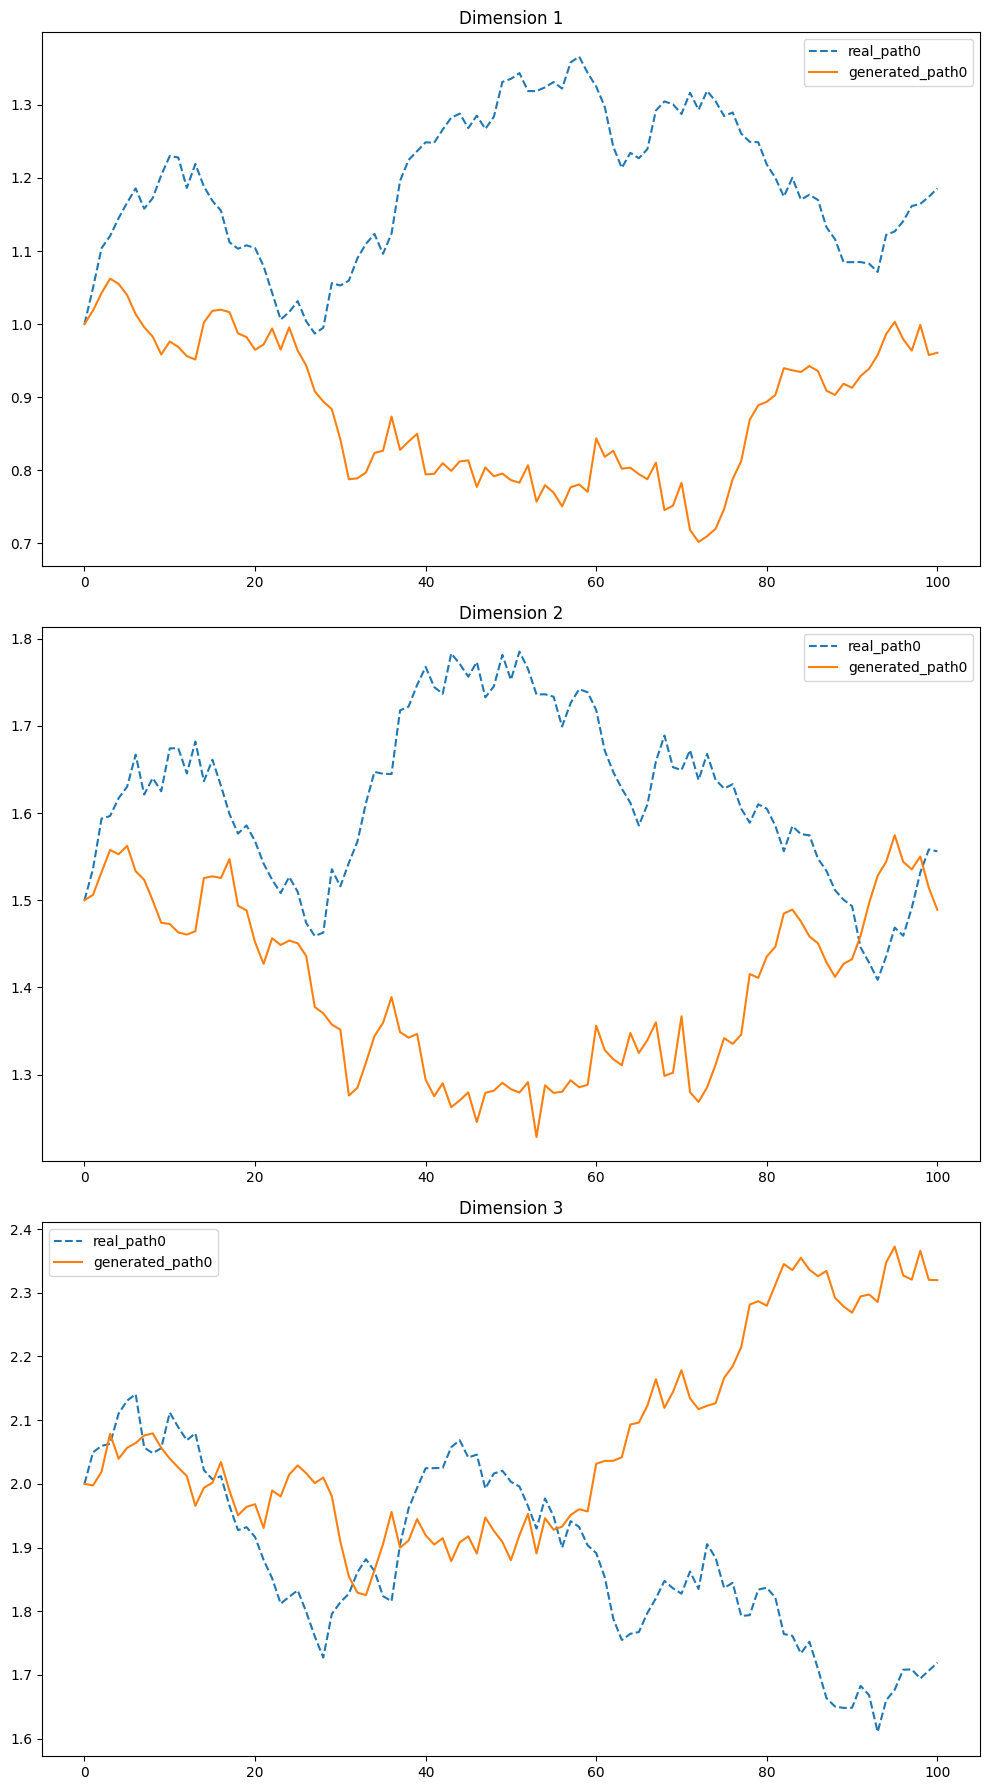

In [23]:
# Plotting each dimension separately
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    real_path = mu_data[:, i, :].T
    generated_path = generated_paths[:,:, i].T

    for j in range(1):
        axs[i].plot(real_path[:, j], label=f'real_path{j}', linestyle="--")
        axs[i].plot(generated_path[:,j].detach().numpy(), label=f'generated_path{j}')
    #axs[i].plot(generated_path.detach().numpy(), label=f'generated_path{j}')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

In [24]:
from scipy.linalg import logm
def estimate_ou_params(paths: np.ndarray, dt: float = 0.01):
    """
    ----------
    paths : ndarray, shape (n_paths, d, n_steps + 1)
        Simulated OU trajectories.
    dt    : float
        Sampling interval of the data.

    Returns
    -------
    k : (d, d) ndarray  
    mu    : (d,)  ndarray   
    Q     : (d, d) ndarray  
    """
    n_paths, d, n_steps_plus1 = paths.shape
    n_steps = n_steps_plus1 - 1

    X0 = paths[:, :, :-1].transpose(0, 2, 1)          
    X1 = paths[:, :,  1:].transpose(0, 2, 1)

    X0 = X0.reshape(-1, d)
    X1 = X1.reshape(-1, d)
    Z    = np.hstack((np.ones((X0.shape[0], 1)), X0))
    beta = np.linalg.lstsq(Z, X1, rcond=None)[0]     
    A    = beta[0]                                    
    Phi  = beta[1:].T                                 


    k = -logm(Phi) / dt                          
    mu    = np.linalg.solve(np.eye(d) - Phi, A)


    resid   = X1 - (A + X0 @ Phi.T)
    Sigma_e = (resid.T @ resid) / resid.shape[0]      
    Q       = Sigma_e / dt                            

    return k, mu, Q


In [25]:
speed_1, mean_1, volatility_1 = estimate_ou_params(mu_data,0.01)
speed_2, mean_2, volatility_2 = estimate_ou_params(generated_paths.detach().numpy().transpose(0,2,1),0.01)

In [26]:
print("Real data parameters: ") 

print (f"speed: \n {speed_1}")
print(f"mean: \n {mean_1}")
print(f"volatility: \n {volatility_1}")

Real data parameters: 
speed: 
 [[ 0.33082218 -0.00176172 -0.0008634 ]
 [ 0.02381161  0.30198362  0.004876  ]
 [ 0.04782316  0.01568744  0.27252782]]
mean: 
 [1.18266072 1.0063067  1.45562998]
volatility: 
 [[0.06003105 0.05506514 0.05999066]
 [0.05506514 0.08252345 0.06499935]
 [0.05999066 0.06499935 0.1099162 ]]


In [27]:
print("Fake data parameters: ")

print (f"speed: \n {speed_2}")
print(f"mean: \n {mean_2}")
print(f"volatility: \n {volatility_2}")

Fake data parameters: 
speed: 
 [[ 1.00069212 -1.33535429  0.79893904]
 [ 0.92102711 -1.51010369  1.39084297]
 [ 1.58768737 -1.82199738  1.07147487]]
mean: 
 [0.05432937 0.18586302 1.20503704]
volatility: 
 [[0.06514838 0.05964212 0.06472842]
 [0.05964212 0.08379256 0.06749184]
 [0.06472842 0.06749184 0.11385831]]
